In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df['gender'].replace(['Female','Male','Other'],[0,1,2],inplace=True)
df['Residence_type'].replace(['Urban','Rural'],[0,1],inplace=True)
df['ever_married'].replace(['No','Yes'],[0,1],inplace=True)
df['work_type'].replace(['Private','Self-employed','children','Govt_job','Never_worked'],[0,1,2,3,4],inplace=True)
df['smoking_status'].replace(['never smoked','Unknown','formerly smoked','smokes'],[0,1,2,3],inplace=True)

In [ ]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,0.832094,0.491977,106.147677,28.893237,1.111742,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.109924,0.499985,45.283560,7.854067,1.071819,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.885000,28.100000,1.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df.bmi.fillna(df.bmi.mean(),inplace=True)

In [ ]:
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


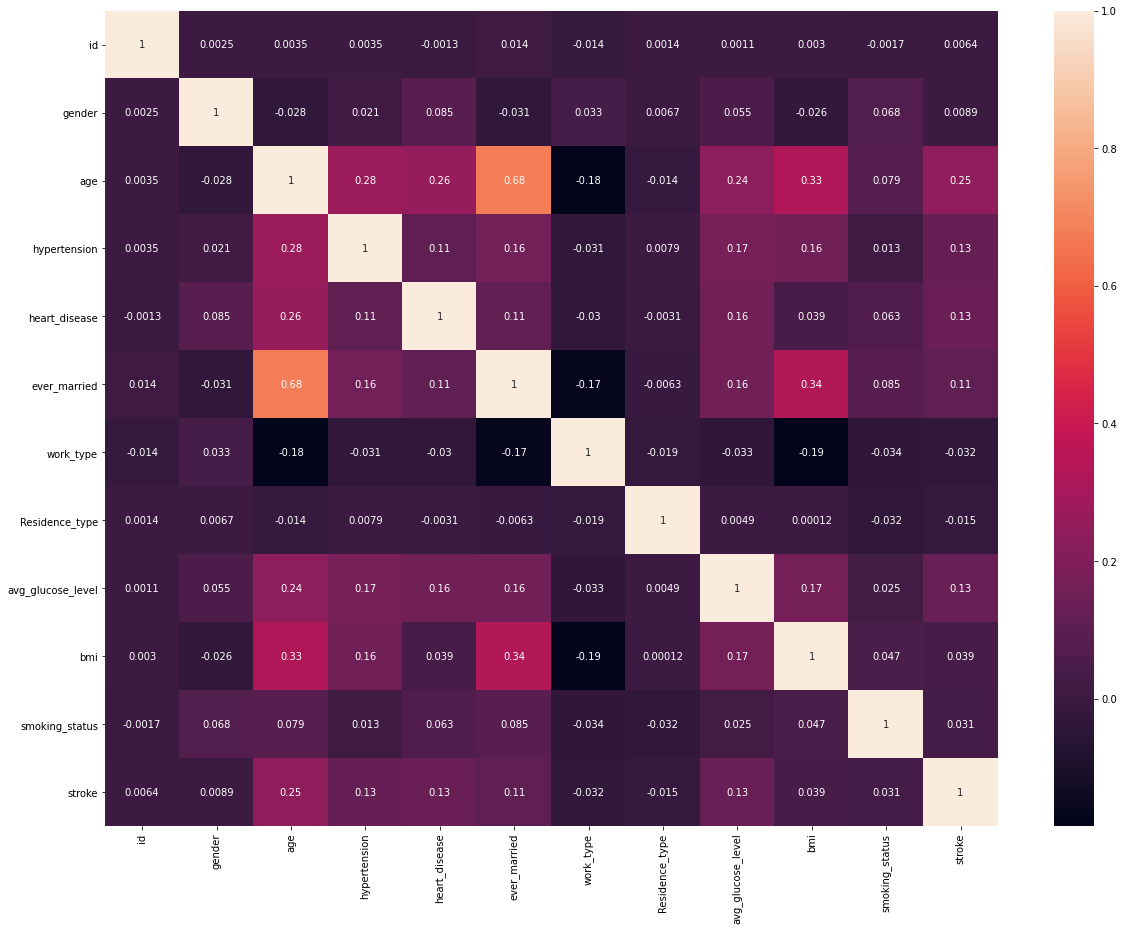

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

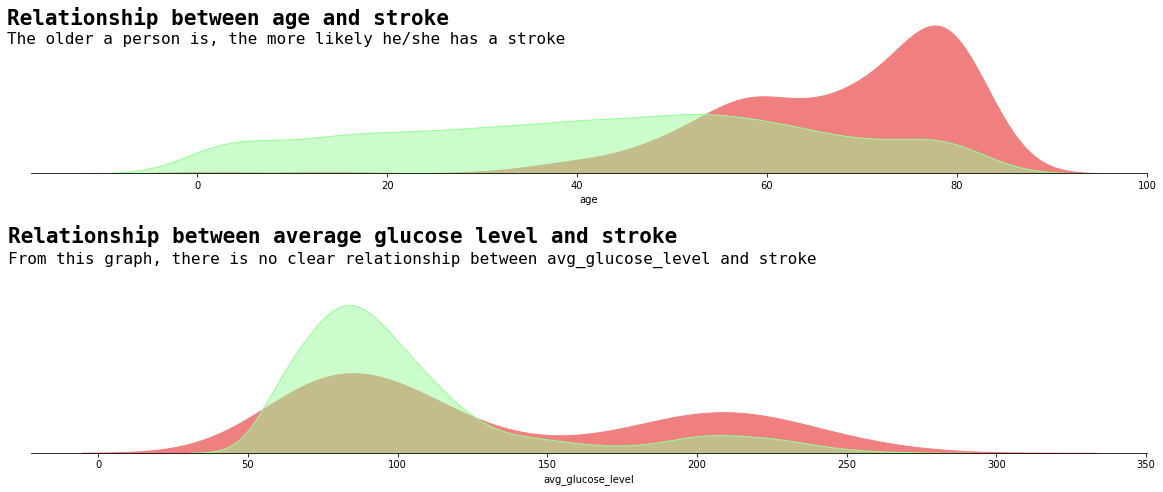

In [ ]:
fig=plt.figure(figsize=(20,8),facecolor='white')

ax=[None for i in range(2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

ax[0].text(-20,0.04,'Relationship between age and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-20,0.035,'The older a person is, the more likely he/she has a stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[1].text(-30,0.023,'Relationship between average glucose level and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-30,0.0207,'From this graph, there is no clear relationship between avg_glucose_level and stroke',fontsize=16,fontweight='light', fontfamily='monospace')

sns.kdeplot(data=df[df.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)

for i in range(2):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

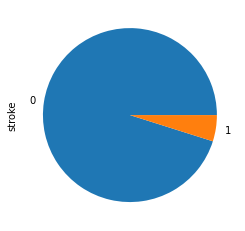

In [ ]:
df['stroke'].value_counts().plot(kind='pie')

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
from sklearn.utils import resample
zero = df[df['stroke']==0]
one = df[df['stroke']==1]

df_upscaled = resample(one,replace=True,n_samples=4861)

df = pd.concat([zero,df_upscaled])

from sklearn.utils import shuffle
df = shuffle(df)

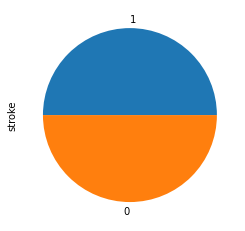

In [ ]:
df['stroke'].value_counts().plot(kind='pie')

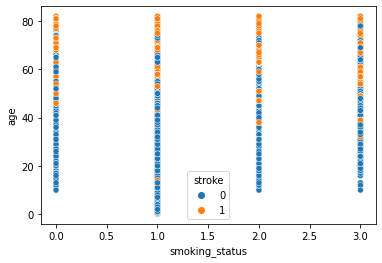

In [ ]:
sns.scatterplot(x=df['smoking_status'],y=df['age'],hue=df['stroke'],data=df)

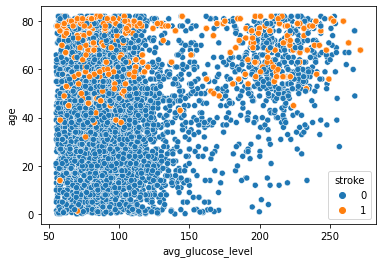

In [ ]:
sns.scatterplot(x=df['avg_glucose_level'],y=df['age'],hue=df['stroke'],data=df)

In [ ]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = X.columns
X[feature] = scaler.fit_transform(X[feature])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#Hyper Parameter Tuning
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

#param tuning for knn
param_knn = {'n_neighbors' : np.arange(1,50)}
grid_knn = GridSearchCV(knn, param_grid = param_knn, cv = 5)

#param tuning for dt
param_dt = {'criterion':['gini','entropy'], 'max_depth': np.arange(1,50),'min_samples_leaf':[1,2,3,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid= param_dt, cv = 5)

#param tuning for rf
param_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf': [2,10,30]}
grid_rf = GridSearchCV(rf, param_grid=param_rf, cv = 5)

#param tuning for ada 
param_ada = {'n_estimators':[50,100,250,400,500,600], 'learning_rate':[0.2,0.5,0.8,1]}
grid_ada = GridSearchCV(ada, param_grid=param_ada, cv = 5)

#param tuning for xgb
param_xgb = {'n_estimators':[50,100,250,400,600,800,1000], 'learning_rate':[0.2,0.5,0.8,1]}
rs_xgb = RandomizedSearchCV(xgb, param_distributions = param_xgb, cv= 5)


In [ ]:
grid_knn.fit(X_train,y_train)
grid_dt.fit(X_train,y_train)
grid_rf.fit(X_train,y_train)
grid_ada.fit(X_train,y_train)
rs_xgb.fit(X_train,y_train)

print("Best params for knn : " , grid_knn.best_params_)
print("Best params for dt : " , grid_dt.best_params_)
print("Best params for rf : " , grid_rf.best_params_)
print("Best params for ada : " , grid_ada.best_params_)
print("Best params for xgb : " , rs_xgb.best_params_)

Best params for knn :  {'n_neighbors': 1}
Best params for dt :  {'criterion': 'gini', 'max_depth': 36, 'min_samples_leaf': 1}
Best params for rf :  {'min_samples_leaf': 2, 'n_estimators': 500}
Best params for ada :  {'learning_rate': 1, 'n_estimators': 600}
Best params for xgb :  {'n_estimators': 1000, 'learning_rate': 0.8}


In [ ]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier(criterion='gini', max_depth=36,min_samples_leaf=1)
rf = RandomForestClassifier(min_samples_leaf=2,n_estimators=500,random_state=42)
ada = AdaBoostClassifier(learning_rate=1,n_estimators=600)
xgb = XGBClassifier(n_estimators=1000,learning_rate=0.8)

bagging = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=36,min_samples_leaf=1,random_state=42),n_estimators=100,random_state=42)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=36,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
    

In [ ]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Decision Tree', dt), ('Random Forest', rf),('AdaBoost', ada),('Bagging Classifier',bagging),('XGBoost',xgb)]


In [ ]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:

  #fit the model
  classifier.fit(X_train,y_train)

  #test model
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  #evaluate the accuracy model
  print('{:s} : {:.2f}'.format(classifier_name,accuracy))

Logistic Regression : 0.95
K Nearest Neighbours : 0.91
Decision Tree : 0.92
Random Forest : 0.95
AdaBoost : 0.95
Bagging Classifier : 0.94
XGBoost : 0.92


In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       484
           1       0.00      0.00      0.00        27

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.90      0.95      0.92       511



Text(0.5, 15.0, 'Predicted label')

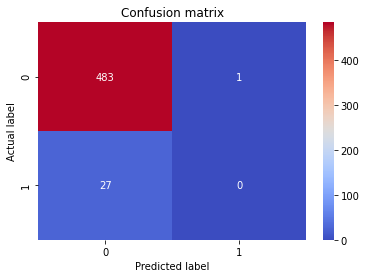

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="coolwarm" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')